# Cleveland Heart Disease Data Set

- This database from UCI Cleveland originally contained 76 attributes, with the final dataset containing only 15 attributes.

- Experiments with the Cleveland database have concentrated on simply attempting to distinguish the presence of heart disease.

- Source: [UCI Cleveland Heart Disease](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)

# Attribute Information

1. age: age in years
2. sex: sex (1 = male; 0 = female)
3. cp: chest pain type
 * Value 1: typical angina
 * Value 2: atypical angina
 * Value 3: non-anginal pain
 * Value 4: asymptomatic
4. restbp: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
 * Value 0: normal
 * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
 * Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. maxhr: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
 * Value 1: upsloping
 * Value 2: flat
 * Value 3: downsloping
12. mv: number of major vessels (0-3) colored by flourosopy
13. thal: thallium heart scan 
 * Value 3: normal
 * Value 6: fixed defect
 * Value 7: reversable defect
14. diagnosis: severerity of heart disease (angiographic disease status)
 * Value 0: Absent
 * Value 1: Level 1 
 * Value 2: Level 2 
 * Value 3: Level 3
 * Value 4: Level 4
15. disease: heart disease
 * Value 0: No 
 * Value 1: Yes

# Load Libraries

In [1]:
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as mtick
pd.options.display.float_format = '{:.0f}'.format

# Load Data

In [2]:
# Reads the CSV file into Python
heart_df = pd.read_csv('ClevelandHeartDisease.csv')

In [3]:
# create binary column to indicate whether patient has heart disease
heart_df['disease'] = np.where(heart_df['diagnosis'] > 0, 1, 0)
heart_df.rename(columns={'diagnosis':'diag'},inplace=True)

# Exploratory Data Analysis (EDA)

In [4]:
# Shows number of non-null columns and data type of the column 
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
age        303 non-null int64
sex        303 non-null int64
cp         303 non-null int64
restbp     303 non-null int64
chol       303 non-null int64
fbs        303 non-null int64
restecg    303 non-null int64
maxhr      303 non-null int64
exang      303 non-null int64
oldpeak    303 non-null float64
slope      303 non-null int64
mv         299 non-null float64
thal       301 non-null float64
diag       303 non-null int64
disease    303 non-null int32
dtypes: float64(3), int32(1), int64(11)
memory usage: 34.4 KB


The `info()` method is important since it shows all the columns in the dataframe and how many non-null entries are in each column. This is important because any null fields will need to be transformed or removed in order to get accurate results. The `info()` method shows what the data type is for each field. Looking at the results there are two different fields that have null values `mv` and `thal`.

In [5]:
# Check if there are any null values in the dataset (False = no null, True = null present)
heart_df.isnull().to_numpy().any()

True

Another way to check and see if any `NULL` values exist in the dataframe is to use the `isnull()` function combined with `.to_numpy()` and `.any()` methods. This will return a boolean `True` or `False`. In this case it shows that there are `NULL` values present or `True`.

In [6]:
# Find null rows
heart_df[heart_df.isnull().any(axis=1)]

,age,sex,cp,restbp,chol,fbs,restecg,maxhr,exang,oldpeak,slope,mv,thal,diag,disease
87,53,0,3,128,216,0,2,115,0,0,1,0,nan,0,0
166,52,1,3,138,223,0,0,169,0,0,1,nan,3,0,0
192,43,1,4,132,247,1,2,143,1,0,2,nan,7,1,1
266,52,1,4,128,204,1,0,156,1,1,2,0,nan,2,1
287,58,1,2,125,220,0,0,144,0,0,2,nan,7,0,0
302,38,1,3,138,175,0,0,173,0,0,1,nan,3,0,0


After identifying the dataframe contains `NULL` records, I wanted to find the rows that contained them. Using the `.isnull()` function with `.any()` method I included `axis=1` to show records with any column containing `NULL` records.

In [7]:
# Drop null rows
heart_df = heart_df.dropna()

The `drop.na()` method drops any record that contains a `NULL` record. I decided to drop the rows that contained `NULL` instead of filling with a test statistic or predicted value. 

In [8]:
heart_df.isnull().values.any()

False

Validating the `NULL` records have been removed from the dataframe. `False` indicates there are no longer any `NULL` records.

In [9]:
# Run descriptive statistics
heart_df.describe()

,age,sex,cp,restbp,chol,fbs,restecg,maxhr,exang,oldpeak,slope,mv,thal,diag,disease
count,297,297,297,297,297,297,297,297,297,297,297,297,297,297,297
mean,55,1,3,132,247,0,1,150,0,1,2,1,5,1,0
std,9,0,1,18,52,0,1,23,0,1,1,1,2,1,0
min,29,0,1,94,126,0,0,71,0,0,1,0,3,0,0
25%,48,0,3,120,211,0,0,133,0,0,1,0,3,0,0
50%,56,1,3,130,243,0,1,153,0,1,2,0,3,0,0
75%,61,1,4,140,276,0,2,166,1,2,2,1,7,2,1
max,77,1,4,200,564,1,2,202,1,6,3,3,7,4,1


The `.describe()` function is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values. You can see after dropping those `NULL` rows has decreased the dataframe from **303** to **297** records.

In [10]:
# Preview the first 5 rows of data
heart_df.head()

,age,sex,cp,restbp,chol,fbs,restecg,maxhr,exang,oldpeak,slope,mv,thal,diag,disease
0,63,1,1,145,233,1,2,150,0,2,3,0,6,0,0
1,67,1,4,160,286,0,2,108,1,2,2,3,3,2,1
2,67,1,4,120,229,0,2,129,1,3,2,2,7,1,1
3,37,1,3,130,250,0,0,187,0,4,3,0,3,0,0
4,41,0,2,130,204,0,2,172,0,1,1,0,3,0,0


The `.head()` function displays the first few rows of data in the dataframe, by default it will show the header and first 5 rows. You could include a number inside the function to increase or decrease the amount of records in the preview. 

### Count Plot

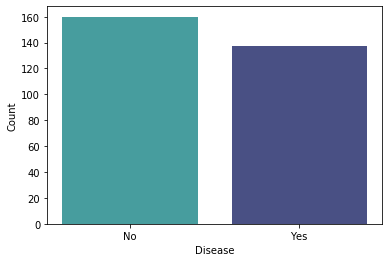

In [11]:
# Shows count of patients who do and don't have heart disease
plt.bar(heart_df['disease'].unique(), heart_df['disease'].value_counts(), color = ['#479D9E', '#495084'])
positions = (0,1)
plt.xticks(positions, ('No','Yes'))
plt.xlabel('Disease')
plt.ylabel('Count')
plt.show()

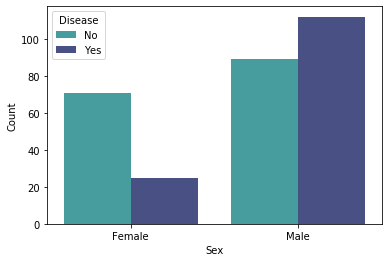

In [12]:
# Shows count of patients who do and don't have heart disease by sex
ax = sns.countplot(x='sex', hue='disease', data=heart_df, palette="mako_r")

# Format labels and legend
ax.set_xlabel('Sex')
ax.set_xticklabels(['Female','Male'])
plt.legend(title='Disease', loc='upper left', labels=['No', 'Yes'])
plt.ylabel('Count')

plt.show()

### Boxplot

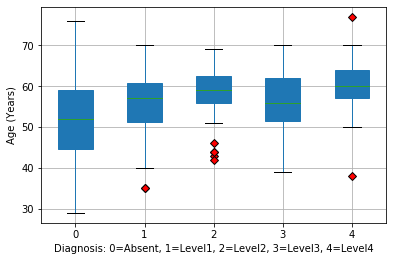

In [13]:
# Method to graphically depict groups of numerical data through their quartile
outliers = dict(markerfacecolor='r', marker='D')
heart_df.boxplot('age', by='diag', flierprops=outliers,patch_artist=True)
plt.xlabel('Diagnosis: 0=Absent, 1=Level1, 2=Level2, 3=Level3, 4=Level4')
plt.ylabel('Age (Years)')
plt.suptitle('')
plt.title('')
plt.show()

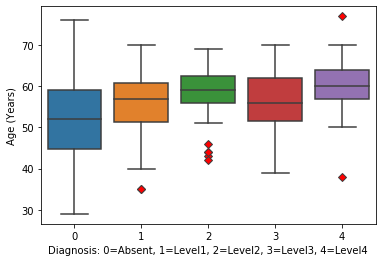

In [14]:
sns.boxplot(x='diag', y='age', data=heart_df,flierprops=outliers)
plt.xlabel('Diagnosis: 0=Absent, 1=Level1, 2=Level2, 3=Level3, 4=Level4')
plt.ylabel('Age (Years)')
plt.show()

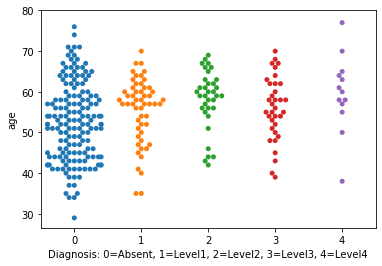

In [15]:
sns.swarmplot(x='diag', y='age', data=heart_df)
plt.xlabel('Diagnosis: 0=Absent, 1=Level1, 2=Level2, 3=Level3, 4=Level4')
plt.show()

### Histogram

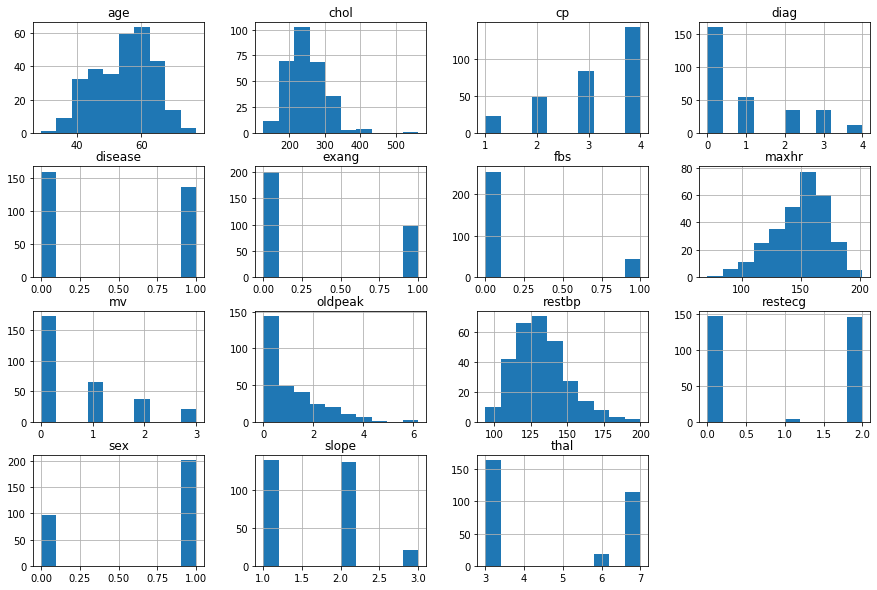

In [16]:
# Graphical representation of the distribution of numerical data
heart_df.hist(figsize=(15,10))
plt.show()

### Correlation Matrix

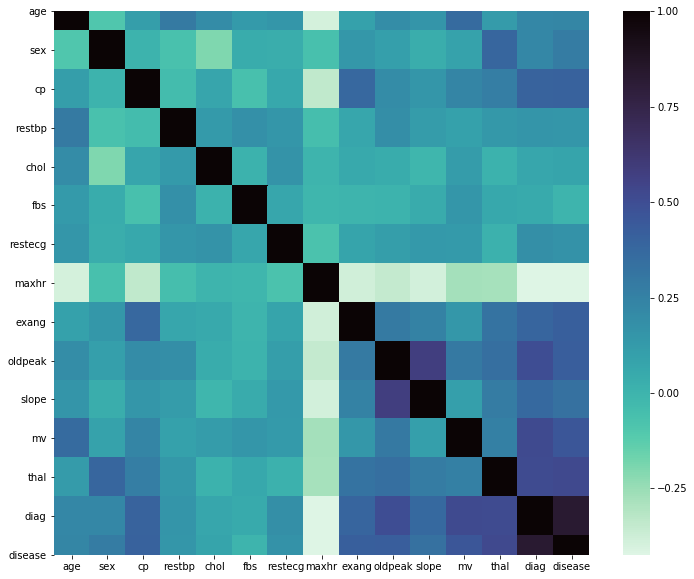

In [17]:
# Highly correlated variables are closer to +1 and less correlated variables are closer to -1.
f, ax = plt.subplots(figsize=(12, 10))
corr = heart_df.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values,cmap = 'mako_r')
plt.show()

### Pair Plot

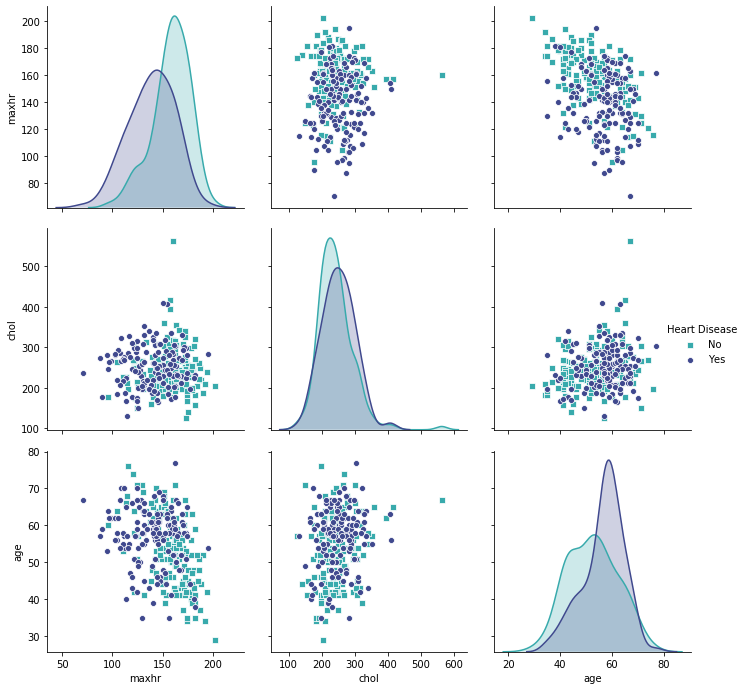

In [18]:
# Shows relationship between variables by target variable 
g = sns.pairplot(heart_df, palette='mako_r', height=3.25, hue='disease', 
                 markers=['s','o'], vars=['maxhr','chol','age'])

# replace legend title
new_title = 'Heart Disease'
g._legend.set_title(new_title)

# replace legend labels
new_labels = ['No', 'Yes']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
    
plt.show()

### Scatter Plot

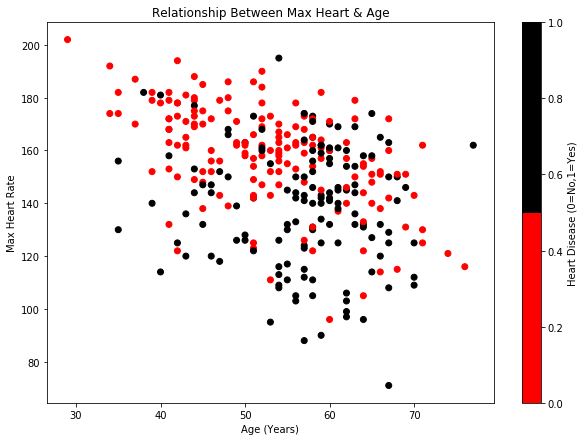

In [19]:
# figure
fig, ax1 = plt.subplots()
fig.set_size_inches(10, 7)

# labels
ax1.set_xlabel('Age (Years)')
ax1.set_ylabel('Max Heart Rate')
ax1.set_title('Relationship Between Max Heart & Age')

# plot
plt.scatter( heart_df['age'], heart_df['maxhr'] , c=heart_df['disease'],
            cmap=plt.cm.get_cmap('flag', 2))
cbar = plt.colorbar()
cbar.set_label('Heart Disease (0=No,1=Yes)')

fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax1.yaxis.set_major_formatter(tick) 
ax1.xaxis.set_major_formatter(tick) 

plt.show()

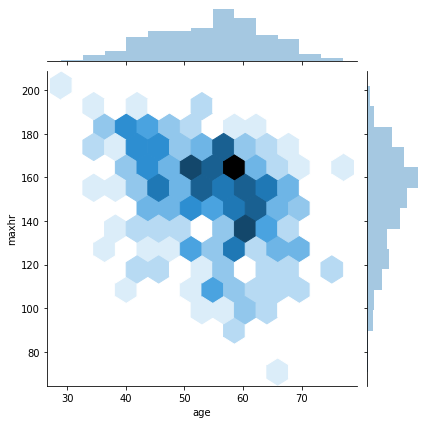

In [20]:
sns.jointplot(x='age',y='maxhr',data=heart_df,kind='hex')
plt.show()

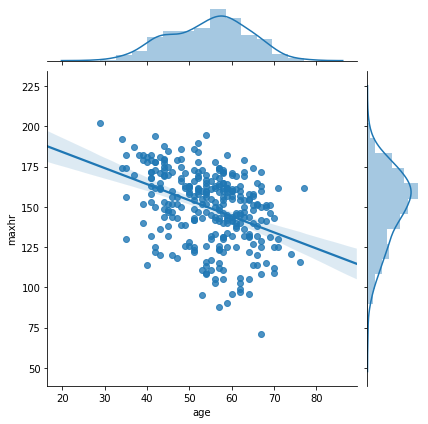

In [21]:
sns.jointplot(x='age', y='maxhr', data=heart_df, kind='reg')
plt.show()

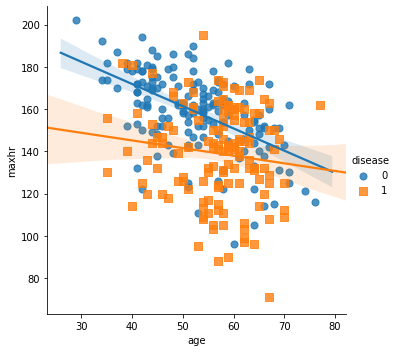

In [22]:
# Seaborn LM Plot with hue
sns.lmplot(x='age', y='maxhr', data=heart_df, hue='disease', markers=['o','s'], scatter_kws={'s':50})
plt.show()

# Decision Tree

In [23]:
# Machine Learning 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Others
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calcul
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix
import pydotplus
from sklearn.preprocessing import StandardScaler

C:\Users\ablock\AppData\Roaming\Python\Python37\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [24]:
# Split dataset in features and target variable
features = ['age','sex','cp','restbp','chol','fbs','restecg','maxhr','exang','slope','mv','thal','oldpeak']

X = heart_df[features] # Features
y = heart_df['disease'] # Target variable

### Splitting Data

In [25]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

### Model

In [26]:
# Create Decision Tree classifer object
dtree_1 = DecisionTreeClassifier()

# Train Decision Tree Classifer
dtree_1.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_1 = dtree_1.predict(X_test)

### Evaluate 

In [27]:
# Model Performance
count_misclassified = (y_test != y_pred_1).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred_1)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 23
Accuracy: 0.74


In [28]:
# Check for accuracy in prediction 1
print(confusion_matrix(y_test, y_pred_1))
print(classification_report(y_test, y_pred_1))

[[36 15]
 [ 8 31]]
              precision    recall  f1-score   support

           0       0.82      0.71      0.76        51
           1       0.67      0.79      0.73        39

    accuracy                           0.74        90
   macro avg       0.75      0.75      0.74        90
weighted avg       0.76      0.74      0.75        90



### Optimize Model

In [29]:
# Create Decision Tree classifer object
dtree_2 = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
dtree_2.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_2 = dtree_2.predict(X_test)

### Evaluate 

In [30]:
# Model Performance
count_misclassified = (y_test != y_pred_2).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred_2)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 22
Accuracy: 0.76


In [31]:
# Check for accuracy in prediction 2
print(confusion_matrix(y_test, y_pred_2))
print(classification_report(y_test, y_pred_2))

[[36 15]
 [ 7 32]]
              precision    recall  f1-score   support

           0       0.84      0.71      0.77        51
           1       0.68      0.82      0.74        39

    accuracy                           0.76        90
   macro avg       0.76      0.76      0.76        90
weighted avg       0.77      0.76      0.76        90



### Visualize Decision Tree

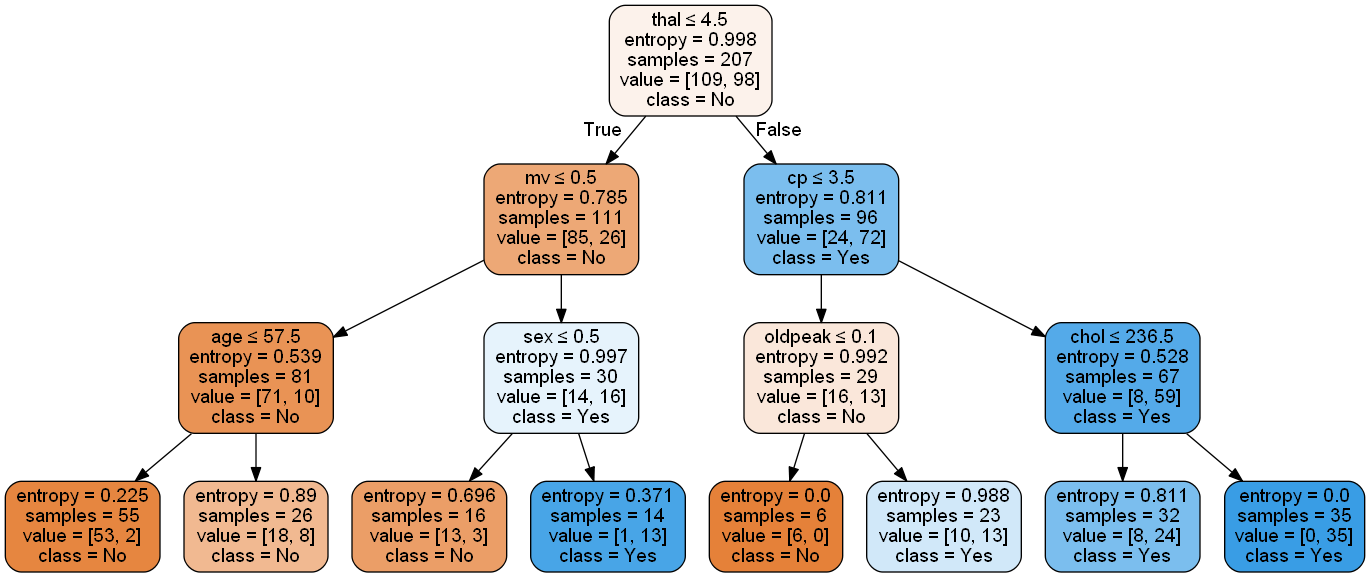

In [32]:
dot_data = StringIO()
export_graphviz(dtree_2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = features,class_names=['No','Yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('decisiontree.png')
Image(graph.create_png())